# Car Price Prediction

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset
dataset = pd.read_csv("Car_Price_Prediction.csv")

In [3]:
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
#describe the data
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Data Preprocessing

In [5]:
# Checking for null values
dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

No null values present.

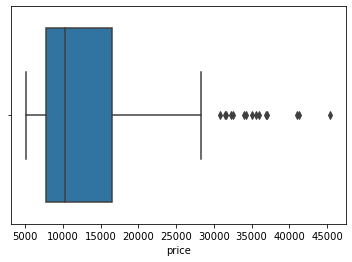

In [6]:
# checking for outliers
sns.boxplot(x="price", data= dataset)

Outliers are present.

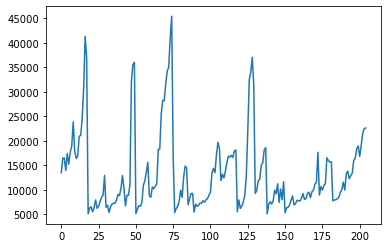

In [7]:
# visualisation to see the presence of outliers
dataset.price.plot()

In [8]:
# Removing outliers
def remove_outliers(dataset, x):
    # set limits
    q25, q75 = np.percentile(dataset[x],25), np.percentile(dataset[x],75)
    iqr = q75 - q25
    cut_off = iqr*1.5
    lower, upper =1,(q75+cut_off)
    dataset = dataset[(dataset[x]<upper)&(dataset[x]>lower)]
    print("Outliers of '{}' are removed\n".format(x))
    return dataset

In [9]:
# Giving arguments to the outlier function
dataset = remove_outliers(dataset, 'price')

Outliers of 'price' are removed



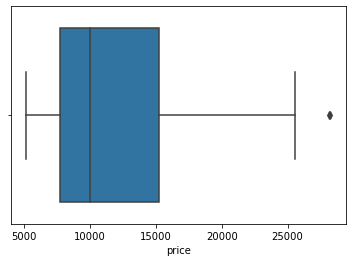

In [10]:
# Rechecking the presence of outliers
sns.boxplot(x="price", data= dataset)

No more outliers present

In [11]:
dataset.shape

(190, 26)

15 rows have been removed.

In [12]:
# Reindexing the dataset
dataset.reset_index(drop = True, inplace= True)

In [13]:
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
186,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
187,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
188,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [14]:
dataset.fueltype.value_counts()

gas       171
diesel     19
Name: fueltype, dtype: int64

In [15]:
dataset.doornumber.value_counts()

four    108
two      82
Name: doornumber, dtype: int64

As there are numbers, let us convert these numbers into numeric form.

In [16]:
def number_(x):
    return x.map({'four':4, 'two': 2})
    
dataset['doornumber'] = dataset[['doornumber']].apply(number_)
    

<ipython-input-16-80245c9704a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['doornumber'] = dataset[['doornumber']].apply(number_)


In [17]:
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
186,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
187,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
188,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [18]:
dataset.aspiration.value_counts()

std      154
turbo     36
Name: aspiration, dtype: int64

In [19]:
dataset.cylindernumber.value_counts()

four     159
six       16
five      10
two        4
three      1
Name: cylindernumber, dtype: int64

As there are numbers, let us convert these numbers into numeric form.

In [20]:
def convert_number(x):
    return x.map({'two':2, 'three':3, 'four':4,'five':5, 'six':6,'eight':8,'twelve':12})

dataset['cylindernumber'] = dataset[['cylindernumber']].apply(convert_number)

<ipython-input-20-cf04949fe9bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cylindernumber'] = dataset[['cylindernumber']].apply(convert_number)


In [21]:
dataset['cylindernumber']

0      4
1      4
2      6
3      4
4      5
      ..
185    4
186    4
187    6
188    6
189    4
Name: cylindernumber, Length: 190, dtype: int64

In [22]:
dataset.stroke.value_counts()

3.400    20
3.030    14
3.150    14
3.230    14
2.640    11
3.390    10
3.290     9
3.460     8
3.350     7
3.270     6
3.190     6
3.070     6
3.580     6
3.500     6
3.410     6
3.520     5
3.110     5
3.860     4
3.255     4
3.470     4
3.640     4
3.540     4
3.900     3
2.190     2
2.800     2
3.080     2
2.680     2
3.210     1
2.870     1
3.160     1
3.120     1
2.070     1
2.360     1
Name: stroke, dtype: int64

In [23]:
#coverting the stroke values into integers
dataset.stroke = dataset.stroke.astype(int)

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [24]:
# Rechecking
dataset.stroke.value_counts()

3    170
2     20
Name: stroke, dtype: int64

In [25]:
dataset.duplicated(subset = ['car_ID']).sum()

0

No duplicate records.

In [26]:
# drop the column "car_ID"
dataset.drop(["car_ID"], axis=1, inplace = True)

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
dataset.enginelocation.value_counts()

front    190
Name: enginelocation, dtype: int64

Only single value for all the entries

In [28]:
# drop "enginelication"
dataset.drop(["enginelocation"], axis=1, inplace = True)

In [29]:
#symboling column- Its assigned insurance risk rating, 
#A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
dataset['symboling'].value_counts()

 0    60
 1    52
 2    32
 3    23
-1    20
-2     3
Name: symboling, dtype: int64

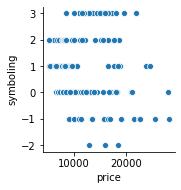

In [30]:
sns.pairplot(y_vars = 'symboling', x_vars = 'price' ,data =dataset)

In [31]:
dataset.CarName.value_counts()

toyota corolla              6
peugeot 504                 6
toyota corona               6
subaru dl                   4
honda civic                 3
                           ..
alfa-romero Quadrifoglio    1
nissan dayz                 1
toyota corolla 1600 (sw)    1
dodge dart custom           1
mitsubishi montero          1
Name: CarName, Length: 134, dtype: int64

We see that CarName is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. 

In [32]:
# extracting company name
dataset['car_company'] = dataset['CarName'].apply(lambda x:x.split(' ')[0])

<ipython-input-32-93b7353cd177>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['car_company'] = dataset['CarName'].apply(lambda x:x.split(' ')[0])


In [33]:
#deleting the original column
dataset = dataset.drop(['CarName'], axis =1)

In [34]:
dataset.carbody.value_counts()

sedan          87
hatchback      69
wagon          25
hardtop         5
convertible     4
Name: carbody, dtype: int64

In [35]:
dataset['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
audi            7
plymouth        7
saab            6
bmw             5
isuzu           4
chevrolet       3
alfa-romero     3
buick           3
maxda           2
renault         2
vw              2
porsche         1
vokswagen       1
mercury         1
Nissan          1
toyouta         1
Name: car_company, dtype: int64

We see some spelling mistakes in the data.

In [36]:
dataset['car_company'].replace('toyouta', 'toyota',inplace=True)
dataset['car_company'].replace('Nissan', 'nissan',inplace=True)
dataset['car_company'].replace('maxda', 'mazda',inplace=True)
dataset['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
dataset['car_company'].replace('vw', 'volkswagen',inplace=True)
dataset['car_company'].replace('porcshce', 'porsche',inplace=True)

In [37]:
#rechecking the data:
dataset['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
audi            7
plymouth        7
saab            6
bmw             5
isuzu           4
chevrolet       3
buick           3
alfa-romero     3
renault         2
porsche         1
mercury         1
Name: car_company, dtype: int64

In [38]:
dataset.drivewheel.value_counts()

fwd    120
rwd     61
4wd      9
Name: drivewheel, dtype: int64

In [39]:
dataset.enginetype.value_counts()

ohc      144
ohcf      12
l         12
dohc      10
ohcv       8
rotor      4
Name: enginetype, dtype: int64

In [40]:
dataset.fuelsystem.value_counts()

mpfi    80
2bbl    66
idi     19
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [41]:
dataset.wheelbase.value_counts()

94.5     21
93.7     20
95.7     13
96.5      8
97.3      7
96.3      6
99.1      6
100.4     6
98.8      6
98.4      6
107.9     6
104.3     6
102.4     5
93.1      5
97.2      5
109.1     5
95.9      5
101.2     4
97.0      4
114.2     4
95.3      4
105.8     3
99.8      2
110.0     2
104.5     2
91.3      2
104.9     2
88.6      2
86.6      2
102.9     2
96.1      2
103.3     2
96.9      2
95.1      1
99.4      1
94.3      1
102.7     1
88.4      1
93.3      1
108.0     1
93.0      1
96.0      1
99.2      1
103.5     1
99.5      1
106.7     1
Name: wheelbase, dtype: int64

In [42]:
dataset.carlength.value_counts()

157.3    15
188.8    11
166.3     7
186.7     7
171.7     7
         ..
165.7     1
177.3     1
181.7     1
178.2     1
189.0     1
Name: carlength, Length: 66, dtype: int64

In [43]:
dataset.carwidth.value_counts()

63.8    24
66.5    23
65.4    15
63.6    11
68.4    10
64.4    10
64.0     9
65.5     8
65.2     7
65.6     6
66.3     6
67.2     6
64.2     6
67.9     4
64.8     4
65.7     4
68.9     4
66.9     4
63.9     3
70.3     3
71.4     3
66.1     2
64.1     2
68.3     2
67.7     2
64.6     2
68.8     1
66.6     1
61.8     1
63.4     1
60.3     1
66.4     1
68.0     1
66.2     1
66.0     1
62.5     1
Name: carwidth, dtype: int64

In [44]:
dataset.carheight.value_counts()

50.8    13
52.0    12
55.7    11
54.5    10
54.1    10
55.5     9
54.3     8
56.1     7
52.6     7
56.7     7
50.2     6
53.0     6
54.9     6
55.1     5
50.6     5
49.6     4
51.6     4
53.7     4
52.8     4
53.3     4
58.7     4
52.5     3
53.5     3
49.7     3
57.5     3
59.1     3
56.2     3
54.4     2
53.9     2
49.4     2
54.7     2
48.8     2
59.8     2
51.4     2
56.5     1
56.0     1
51.0     1
55.9     1
55.2     1
50.5     1
55.6     1
53.1     1
54.8     1
53.2     1
52.4     1
58.3     1
Name: carheight, dtype: int64

In [45]:
dataset.curbweight.value_counts()

2385    4
2275    3
1918    3
1989    3
2395    2
       ..
1956    1
2037    1
2465    1
2976    1
2304    1
Name: curbweight, Length: 159, dtype: int64

In [46]:
dataset.enginesize.value_counts()

122    15
92     15
98     14
97     14
108    13
90     12
110    12
109     8
120     7
141     7
146     6
121     6
152     6
181     6
136     5
156     5
91      5
130     4
70      3
183     3
164     3
171     3
131     2
132     2
134     2
140     2
119     1
111     1
103     1
145     1
151     1
161     1
80      1
79      1
173     1
61      1
Name: enginesize, dtype: int64

In [47]:
dataset.boreratio.value_counts()

3.19    20
3.62    20
3.15    15
2.97    12
3.03    12
3.43     8
3.31     8
3.78     8
3.46     7
2.91     7
3.27     7
3.33     6
3.39     6
3.05     6
3.01     5
3.58     5
3.70     5
3.54     5
3.35     4
3.59     3
3.17     3
3.13     2
3.24     2
3.50     2
3.47     2
3.61     1
3.60     1
3.94     1
3.76     1
3.34     1
2.68     1
2.92     1
3.08     1
2.54     1
2.99     1
Name: boreratio, dtype: int64

In [48]:
dataset.stroke.value_counts()

3    170
2     20
Name: stroke, dtype: int64

In [49]:
dataset.compressionratio.value_counts()

9.00     46
9.40     26
8.50     14
9.30     11
9.50     10
8.70      9
9.20      8
7.00      7
8.40      5
8.60      5
9.60      5
21.00     5
7.50      5
23.00     5
7.60      4
8.00      3
8.80      3
21.50     3
22.50     3
10.00     2
7.70      2
9.31      1
7.80      1
22.00     1
21.90     1
9.41      1
10.10     1
9.10      1
22.70     1
8.30      1
Name: compressionratio, dtype: int64

In [50]:
dataset.horsepower.value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
114     6
160     6
88      6
101     6
62      6
82      5
84      5
90      5
97      5
102     5
76      5
145     5
92      4
111     4
86      4
152     3
73      3
123     3
85      3
121     3
162     2
161     2
156     2
52      2
100     2
94      2
56      2
112     2
55      1
58      1
60      1
72      1
64      1
200     1
78      1
175     1
106     1
115     1
120     1
134     1
135     1
140     1
142     1
143     1
154     1
48      1
Name: horsepower, dtype: int64

In [51]:
dataset.peakrpm.value_counts()

5500    37
4800    36
5000    26
5200    23
5400    10
6000     9
5250     7
5800     7
4500     5
5100     5
4200     5
4150     5
4250     3
4400     3
4350     3
6600     2
5300     1
5600     1
4650     1
4900     1
Name: peakrpm, dtype: int64

In [52]:
dataset.citympg.value_counts() 

31    28
19    27
24    22
27    14
26    12
23    12
17     9
21     8
30     8
25     8
38     7
28     7
37     6
22     3
20     3
29     3
18     3
16     2
47     1
32     1
33     1
34     1
35     1
36     1
45     1
49     1
Name: citympg, dtype: int64

In [53]:
dataset.highwaympg.value_counts() 

38    17
24    17
30    16
32    16
25    15
34    14
37    13
28    12
29    10
33     9
31     8
23     7
22     6
27     5
43     4
41     3
42     3
26     3
39     2
46     2
47     2
36     2
54     1
53     1
50     1
20     1
Name: highwaympg, dtype: int64

### Data Visualisations

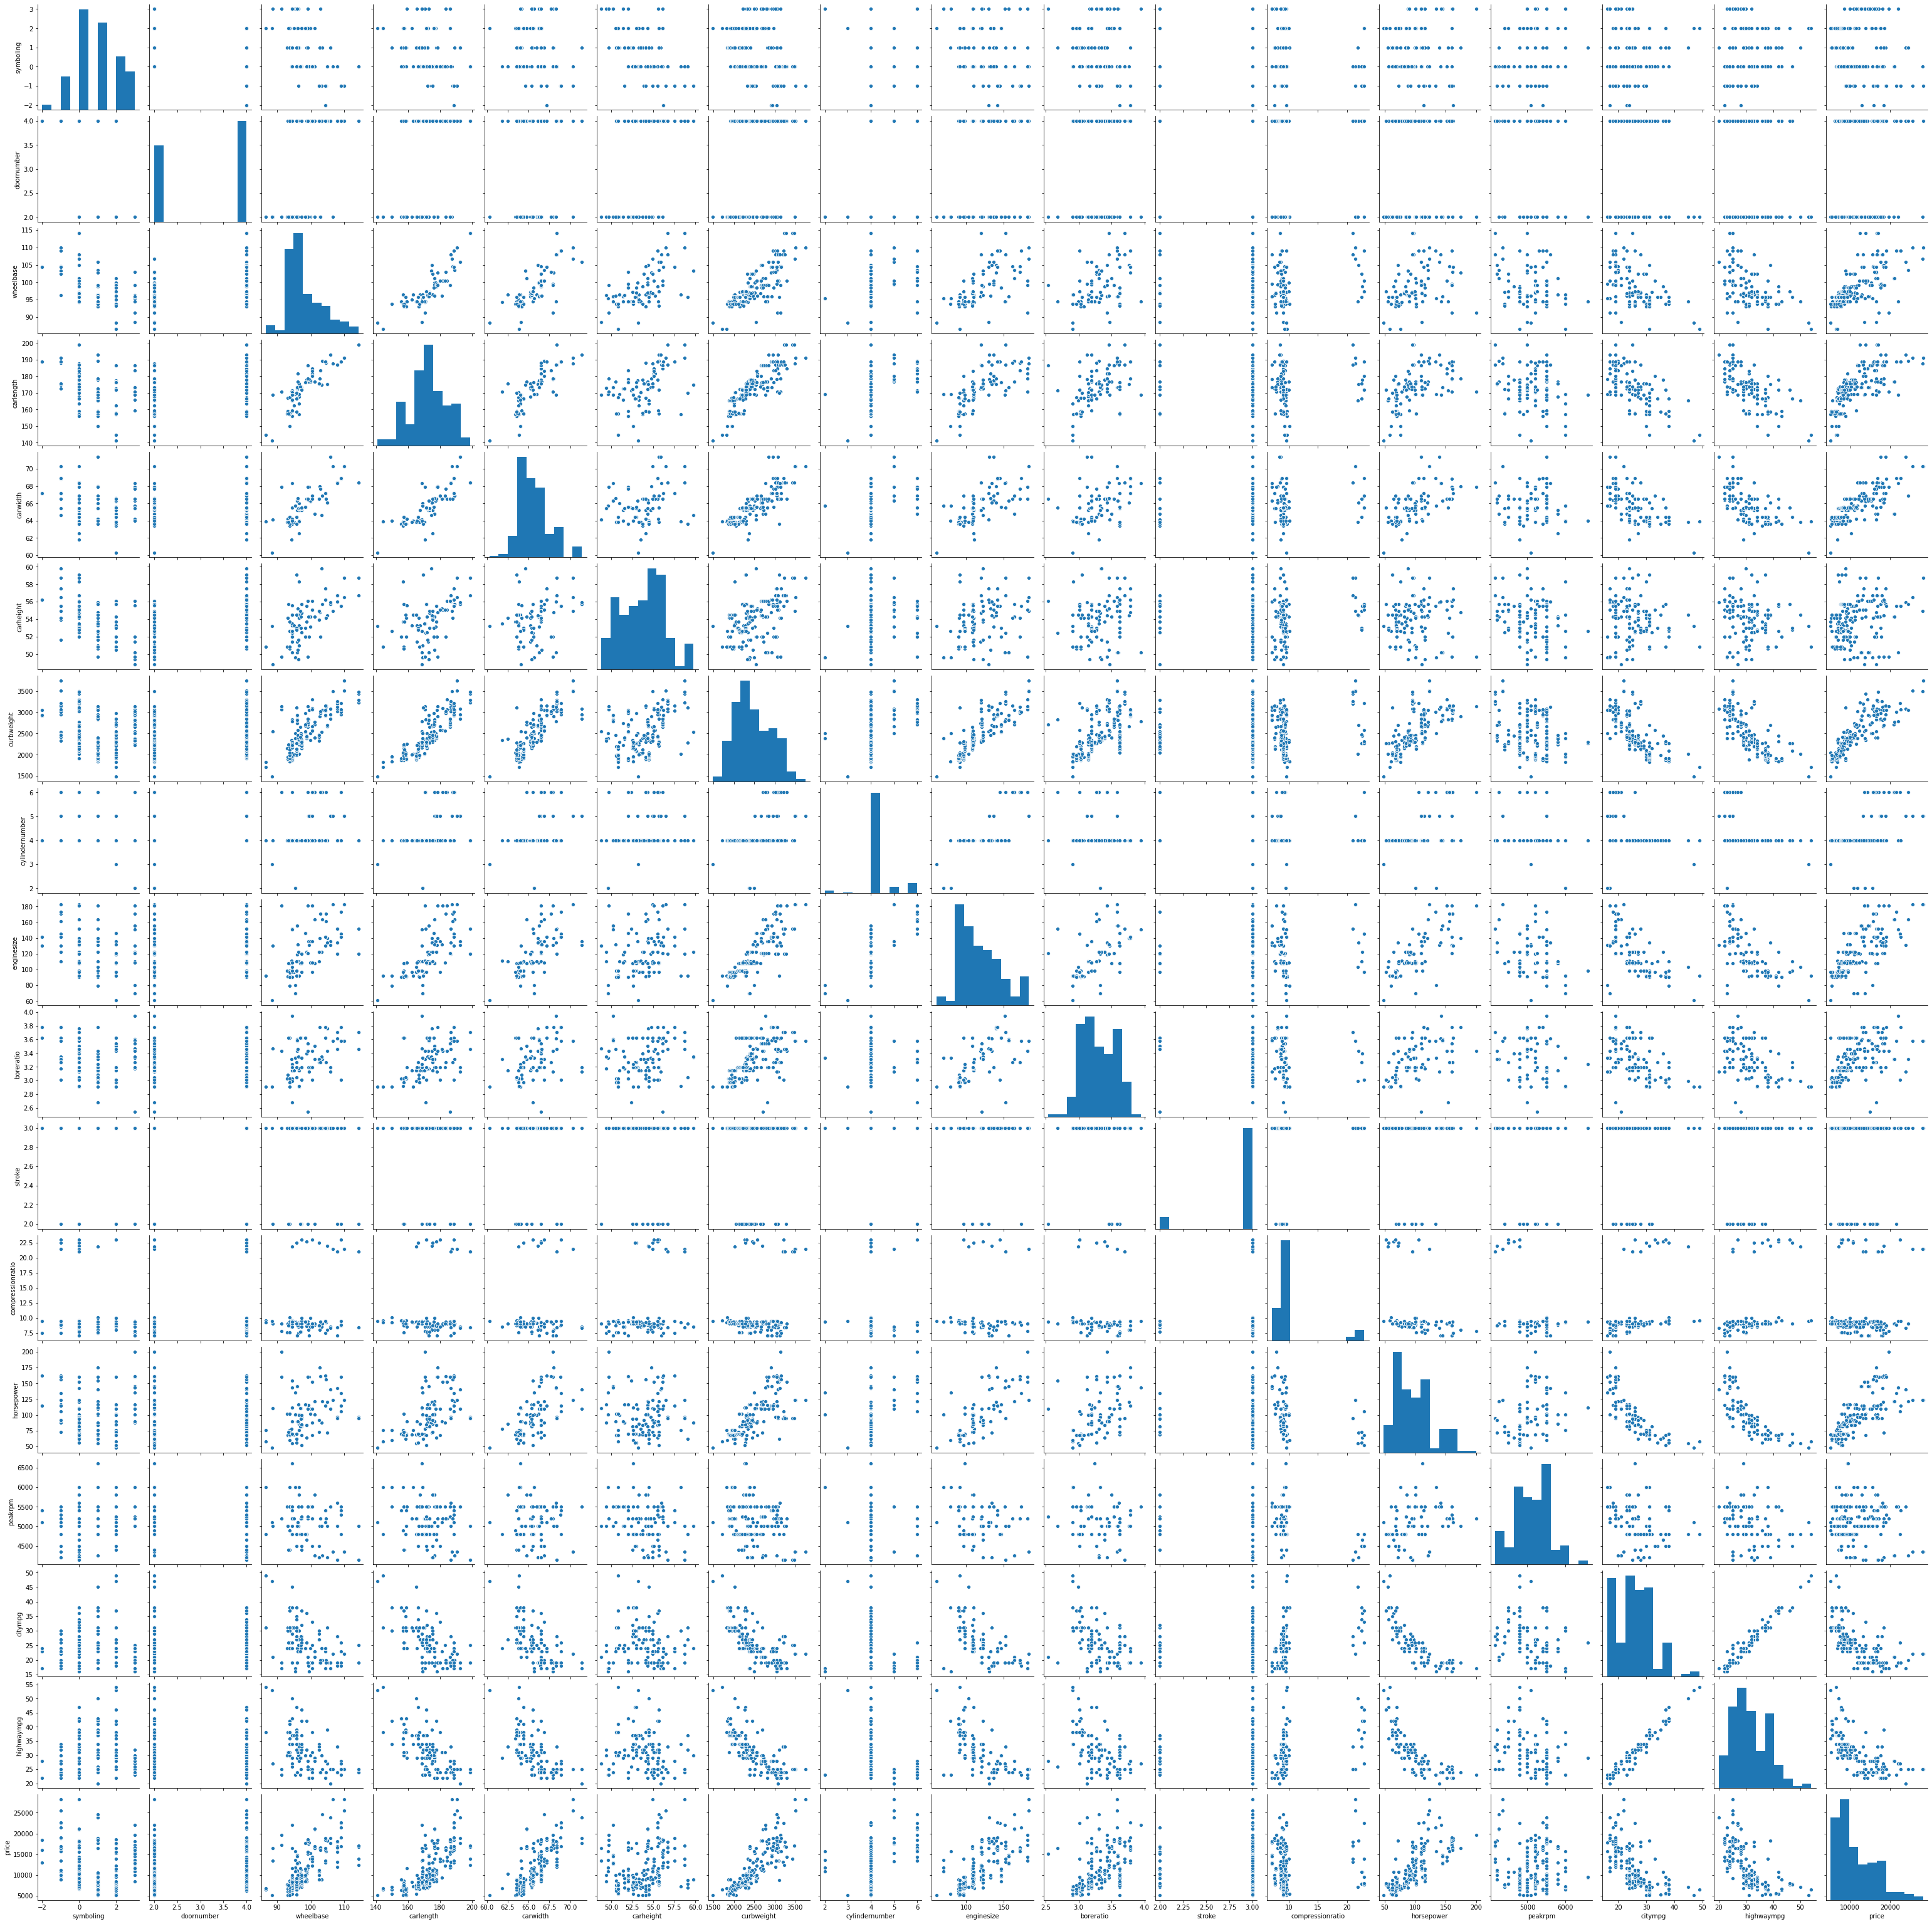

In [55]:
sns.pairplot(dataset)

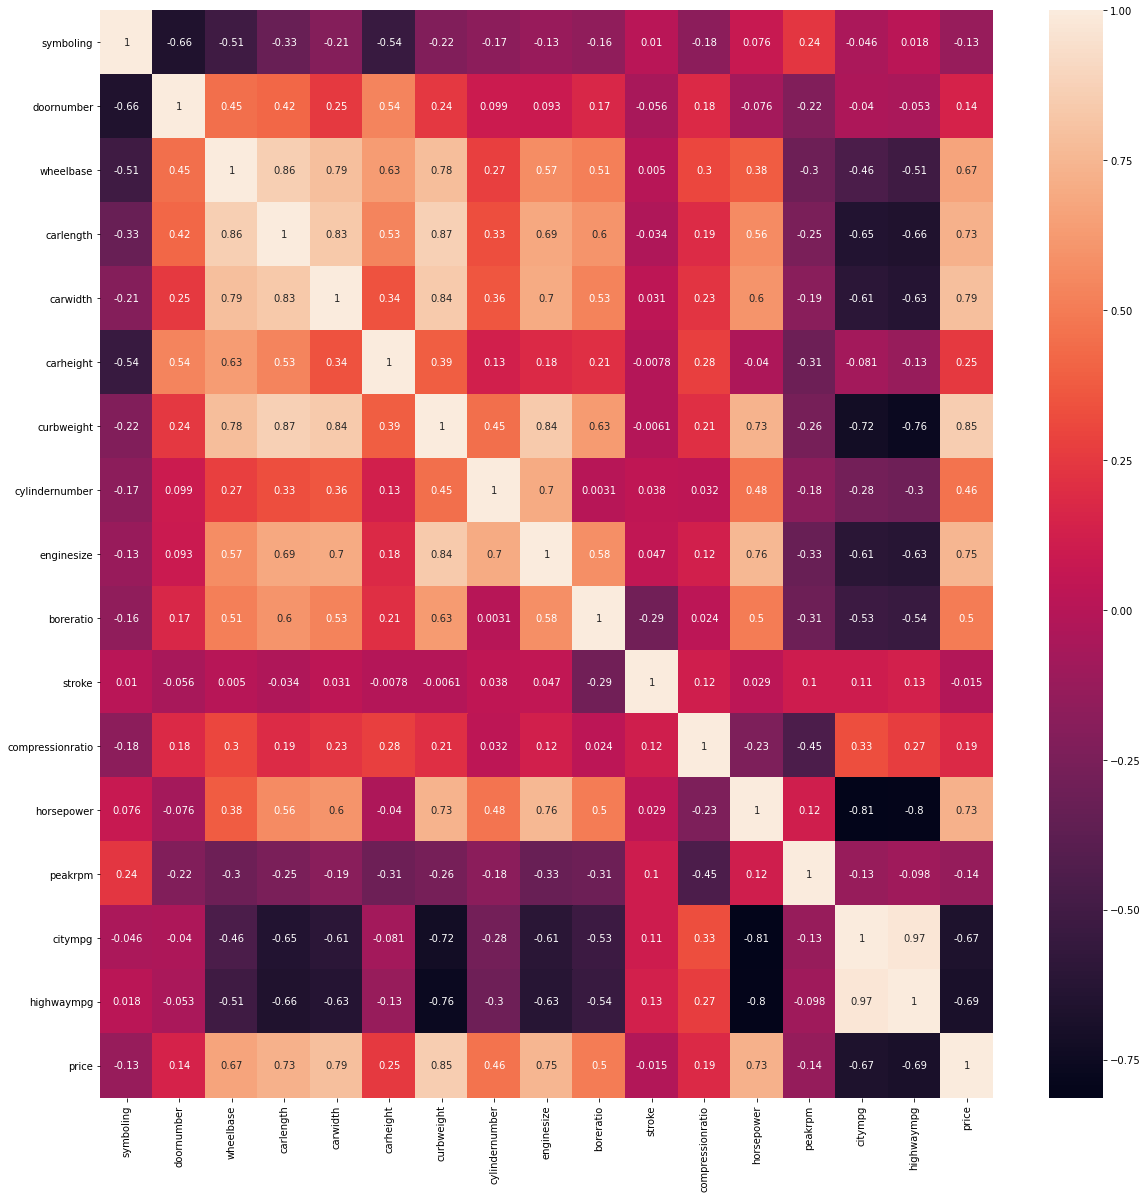

In [56]:
plt.figure(figsize = (20,20))
sns.heatmap(dataset.corr(), annot = True)
plt.show()

- Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower.

- Price is negatively correlated to symboling, citympg and highwaympg.
- This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower.

- There are many independent variables which are highly correlated: wheelbase, carlength, curbweight, enginesize etc.. all are positively correlated.

In [96]:
# carlength and highwaympg have high correlation ratio with other independent variables
dataset.drop(["carlength", "highwaympg"], axis=1, inplace = True)

In [54]:
categorical_cols = dataset.select_dtypes(include = ['object'])
categorical_cols.head()

,fueltype,aspiration,carbody,drivewheel,enginetype,fuelsystem,car_company
0,gas,std,convertible,rwd,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,ohc,mpfi,audi
4,gas,std,sedan,4wd,ohc,mpfi,audi


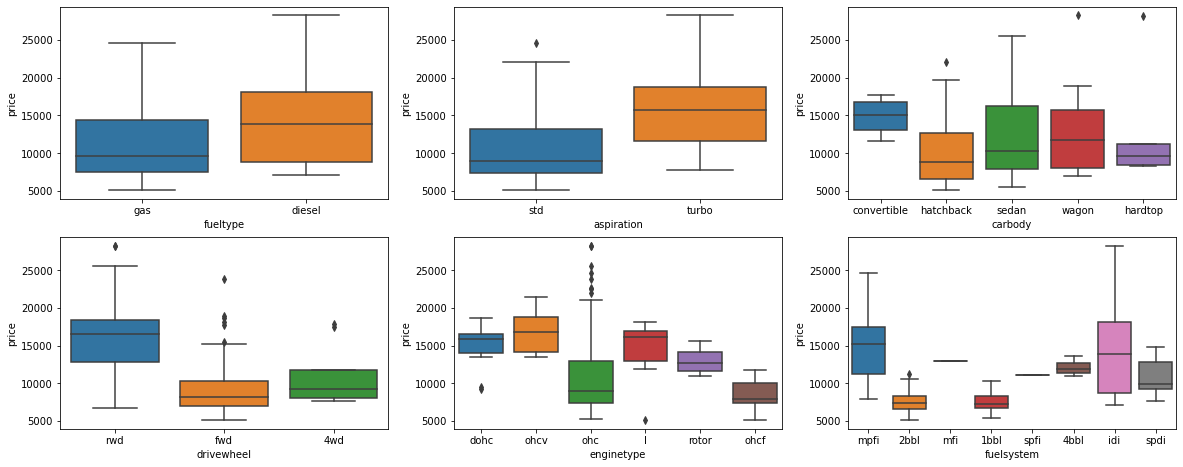

In [59]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = dataset)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = dataset)
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = dataset)
plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = dataset)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginetype', y = 'price', data = dataset)
plt.subplot(3,3,6)
sns.boxplot(x = 'fuelsystem', y = 'price', data = dataset)

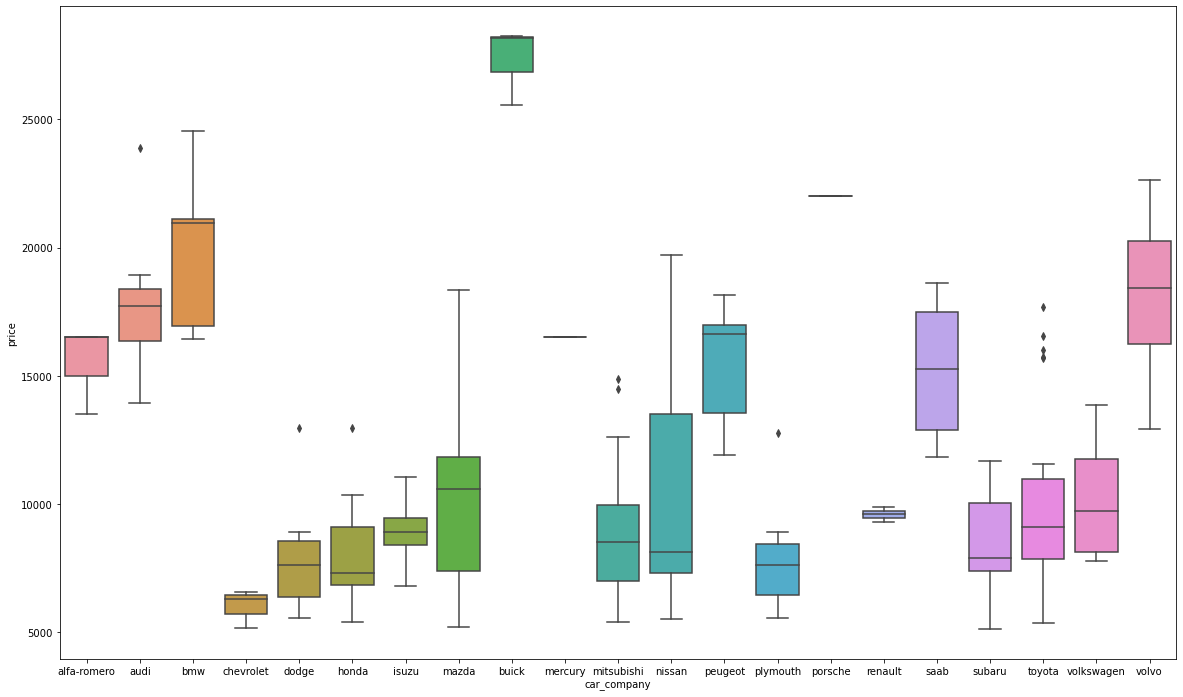

In [60]:
plt.figure(figsize = (20,12))
sns.boxplot(x = 'car_company', y = 'price', data = dataset)

    1.From the price boxplot it is clear that The brands with the most expensive vehicles in the dataset belong to Bmw,Buick,Jaguar and porsche.
    2. Whereas the lower priced cars belong to chevrolet
    3. The median price of gas vehicles is lower than that of Diesel Vehicles.
    4. 75th percentile of standard aspirated vehicles have a price lower than the median price of turbo aspirated vehicles. 
    5. Two and four Door vehicles are almost equally priced. There are however some outliers in the price of 
    two-door vehicles. 
    6. Hatchback vehicles have the lowest median price of vehicles in the data set whereas hardtop vehicles have 
    the highest median price.
    7. The price of vehicles with rear placed engines is significantly higher than the price of vehicles with front 
    placed engines. 
    8. Almost all vehicles in the dataset have engines placed in the front of the vehicle. However, the price of 
    vehicles with rear placed engines is significantly higher than the price of vehicles with front placed engines. 
    9. The median cost of eight cylinder vehicles is higher than other cylinder categories.
    10. It is clear that vehicles Multi-port Fuel Injection [MPFI] fuelsystem have the highest median price. There are 
    also some outliers on the higher price side having MPFI systems.
    11. Vehicles with OHCV engine type falls under higher price range.

In [55]:
# Encoding
dataset = pd.get_dummies(dataset, drop_first = True)

In [56]:
dataset

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,-1,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,...,0,0,0,0,0,0,0,0,0,1
186,-1,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,...,0,0,0,0,0,0,0,0,0,1
187,-1,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,...,0,0,0,0,0,0,0,0,0,1
188,-1,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,...,0,0,0,0,0,0,0,0,0,1


In [57]:
# seperating the dependent and independent features
X = dataset.drop('price', axis=1).values
y= dataset.price.values

In [72]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [73]:
X_train

array([[  0. ,   4. , 104.9, ...,   0. ,   0. ,   0. ],
       [  3. ,   2. , 102.9, ...,   1. ,   0. ,   0. ],
       [  0. ,   4. ,  96.5, ...,   0. ,   0. ,   0. ],
       ...,
       [  3. ,   2. ,  95.9, ...,   0. ,   0. ,   0. ],
       [  0. ,   4. ,  95.7, ...,   1. ,   0. ,   0. ],
       [  0. ,   4. ,  96.5, ...,   0. ,   0. ,   0. ]])

In [74]:
X_test

array([[  1. ,   2. ,  93.7, ...,   0. ,   0. ,   0. ],
       [  2. ,   2. ,  93.7, ...,   0. ,   0. ,   0. ],
       [ -1. ,   4. , 103.3, ...,   0. ,   0. ,   0. ],
       ...,
       [  0. ,   4. , 100.4, ...,   0. ,   0. ,   0. ],
       [  3. ,   2. ,  95.9, ...,   0. ,   0. ,   0. ],
       [  1. ,   2. ,  94.5, ...,   0. ,   0. ,   0. ]])

In [75]:
y_train

array([18280.   , 16558.   ,  7295.   , 19699.   ,  5118.   , 11245.   ,
       17199.   ,  8916.5  ,  6575.   , 15250.   , 22018.   ,  7395.   ,
       11248.   ,  7775.   ,  5348.   ,  7975.   , 11259.   ,  5572.   ,
       15690.   ,  9959.   ,  8495.   ,  7957.   , 11850.   , 10345.   ,
        6855.   ,  5195.   , 11595.   ,  6692.   ,  9495.   , 13295.   ,
       20970.   , 17950.   ,  7349.   ,  7738.   , 18950.   , 17075.   ,
        9895.   , 21105.   , 18620.   ,  7995.   ,  6095.   ,  9298.   ,
        8845.   ,  8449.   , 13845.   , 18420.   , 14399.   ,  9549.   ,
       21485.   , 13200.   , 15998.   ,  8189.   ,  6229.   ,  7898.   ,
       16500.   ,  8499.   ,  7499.   , 11199.   , 17710.   ,  8948.   ,
       13495.   ,  9980.   ,  9279.   ,  5389.   , 10595.   ,  6918.   ,
        8949.   , 12170.   ,  6795.   , 28248.   ,  6989.   , 13499.   ,
        9538.   , 13415.   ,  8249.   , 16845.   ,  6338.   ,  7775.   ,
       16430.   ,  7895.   ,  7295.   ,  9995.   , 

In [76]:
y_test

array([ 7129.,  6189.,  8921., 15510.,  6849.,  9639.,  9095., 16695.,
       13860., 12440.,  7053.,  6295., 14489., 10698., 10198.,  6669.,
       15040.,  6785., 17450.,  6695., 13645., 18399., 16515.,  8058.,
        5399.,  8845., 16925.,  5572.,  8195., 10245., 24565., 18150.,
       22470.,  6377.,  5499., 13499., 12764.,  7799.])

In [77]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Building

In [97]:
# Building the model
from sklearn.linear_model import LinearRegression
mul_reg = LinearRegression()
mul_reg.fit(X_train, y_train)
y_pred1 = mul_reg.predict(X_test)

In [98]:
from sklearn import tree
d_tree = tree.DecisionTreeRegressor()
d_tree.fit(X_train,y_train)
y_pred2= d_tree.predict(X_test)

### Model Evaluation

In [99]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [100]:
print("Training Accuracy For Multiple Regression:", mul_reg.score(X_train, y_train))
print("Testing Accuracy For Multiple Regression:", mul_reg.score(X_test, y_test))

Training Accuracy For Multiple Regression: 0.9564556770711334
Testing Accuracy For Multiple Regression: 0.8856667170003862


In [101]:
print("Training Accuracy For Decision Tree:", d_tree.score(X_train, y_train))
print("Testing Accuracy For Decision Tree:", d_tree.score(X_test, y_test))

Training Accuracy For Decision Tree: 0.9984198981227348
Testing Accuracy For Decision Tree: 0.8543262562440161


In [102]:
print("MAE For Multiple Regression:",metrics.mean_absolute_error(y_test,y_pred1))
print("MSE For Multiple Regression:",metrics.mean_squared_error(y_test,y_pred1))
print("RMSE For Multiple Regression:",np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE For Multiple Regression: 1302.4020045252284
MSE For Multiple Regression: 2814304.5348779666
RMSE For Multiple Regression: 1677.5889052082953


In [103]:
print("MAE For Decision Tree",metrics.mean_absolute_error(y_test,y_pred2))
print("MSE For Decision Tree:",metrics.mean_squared_error(y_test,y_pred2))
print("RMSE For Decision Tree:",np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE For Decision Tree 1395.2368421052631
MSE For Decision Tree: 3585747.447368421
RMSE For Decision Tree: 1893.6069939056576


### Result Visualisations

Text(0, 0.5, 'Price')

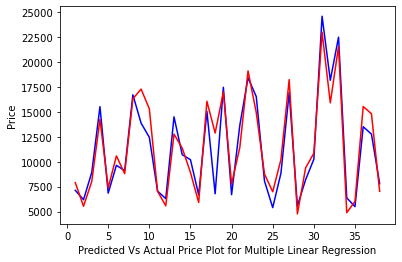

In [104]:
c = [i for i in range(1,39,1)]
plt.plot(c, y_test,color = 'Blue')
plt.plot(c, y_pred1,color = 'red')
plt.xlabel("Predicted Vs Actual Price Plot for Multiple Linear Regression")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

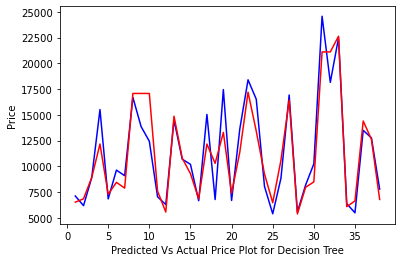

In [105]:
c = [i for i in range(1,39,1)]
plt.plot(c, y_test,color = 'Blue')
plt.plot(c, y_pred2,color = 'red')
plt.xlabel("Predicted Vs Actual Price Plot for Decision Tree")
plt.ylabel("Price")

Text(0, 0.5, 'y_pred')

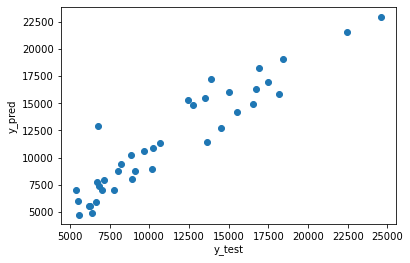

In [106]:
plt.scatter(y_test, y_pred1)
plt.xlabel('y_test')
plt.ylabel('y_pred')

Text(0, 0.5, 'y_pred')

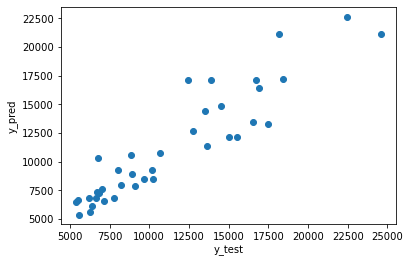

In [107]:
plt.scatter(y_test, y_pred2)
plt.xlabel('y_test')
plt.ylabel('y_pred')

### Here, Multiple Linear Regression Outperforms Decision Tree Algorithm.